In [43]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import the necessary methods from tweepy library
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

In [3]:
import os
from dotenv import load_dotenv
from pathlib import Path  # python3 only

In [158]:
env_path = Path('..') / '.env'
load_dotenv(dotenv_path=env_path)

True

In [159]:
#Environemnt variables that contains the user credentials to access Twitter API 
access_token = os.getenv("Access_token")
access_token_secret = os.getenv("Access_token_secret")
consumer_key = os.getenv("API_key")
consumer_secret = os.getenv("API_secret_key")

In [94]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [95]:
try:
    redirect_url = auth.get_authorization_url()
except tweepy.TweepError:
    print('Error! Failed to get request token.')

In [ ]:
#api.update_status('tweepy + oauth!') #this posts tweets for you
#public_tweets = api.home_timeline()

- **If listening to a stream**

In [ ]:
def streaming_tweets():
    #This is a basic listener that just prints received tweets to stdout.
    class StdOutListener(StreamListener):

        def on_data(self, data):
            print(data)
            return True

        def on_error(self, status):
            print(status)

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'GoT'
    stream.filter(track=['#GameofThrones'])

tweets_path = '../data/twitter_data.txt'

tweets_data = []
with open(tweets_path, "r") as f:
    for line in f:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue

- **If searching for all hashtags since a certain day**

In [160]:
api = tweepy.API(auth)

In [161]:
gtweets = []
try:
    for tweet in tweepy.Cursor(api.search,q="#GameofThrones",count=100,
                               lang="en",
                               since="2019-05-18",
                               until="2019-05-19").items():
        gtweets.append(tweet)
except:
    print("Reached rate limit. Please try again later.")

Reached rate limit. Please try again later.


In [109]:
tweets_data = []
for line in gtweets:
    try:
        tweet = line._json
        tweets_data.append(tweet)
    except:
        continue

In [110]:
len(tweets_data)

12562

# Get tweets into a dataframe

In [111]:
tweets = pd.DataFrame()

In [18]:
tweets_data[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [112]:
interest = ['created_at', 'text','geo', 'coordinates','is_quote_status', 'retweet_count', 'favorite_count', 'lang']

> 'retweeted' is always False so retweet_count is more reliable.

> 'favorited' as well

In [113]:
for dim in interest:
    tweets[dim] = list(map(lambda tweet: tweet[dim], tweets_data))

In [114]:
tweets.sort_values("created_at", ascending = True).head(10)

,created_at,text,geo,coordinates,is_quote_status,retweet_count,favorite_count,lang
12561,Sun May 26 03:38:24 +0000 2019,RT @RottenTomatoes: Every season of #GameofThr...,None,None,False,757,0,en
12560,Sun May 26 03:38:36 +0000 2019,Just watched the season finale of #GameOfThron...,None,None,False,0,3,en
12559,Sun May 26 03:38:38 +0000 2019,Tyrion's quips the first season are just amazi...,None,None,False,0,0,en
12558,Sun May 26 03:38:46 +0000 2019,My dog left me this cryptic message this morni...,None,None,False,1,1,en
12557,Sun May 26 03:39:00 +0000 2019,RT @Thrones_Memes: People that don't watch #Ga...,None,None,False,6227,0,en
12556,Sun May 26 03:39:16 +0000 2019,RT @IndiiCreates: ✨ART RAFFLE✨\nThank you so m...,None,None,False,610,0,en
12555,Sun May 26 03:39:17 +0000 2019,"RT @theDALTONcastle: Yesterday, I requested my...",None,None,False,881,0,en
12554,Sun May 26 03:39:30 +0000 2019,"RT @CBR: #GameofThrones Fans Raise Over $25,00...",None,None,False,7,0,en
12553,Sun May 26 03:39:38 +0000 2019,"Well, I didn’t think I could do it. 🤭\n\nI did...",None,None,False,0,3,en
12552,Sun May 26 03:39:48 +0000 2019,RT @thronesfacts: HBO Exec @CaseyBloys says th...,None,None,False,76,0,en


In [5]:
tweets = pd.read_csv('../data/GoTweets.csv', index_col=0)

In [68]:
tweets.shape

(12711, 8)

In [23]:
tweets.head()

,created_at,text,geo,coordinates,is_quote_status,retweet_count,favorite_count,lang
0,Sun May 26 17:21:08 +0000 2019,RT @vincenzolandino: Flying dragon in augmente...,None,None,False,12,0,en
1,Sun May 26 17:21:05 +0000 2019,RT @GameOfThrones: The Last Watch.\nFrom @Jean...,None,None,False,2670,0,en
2,Sun May 26 17:21:04 +0000 2019,RT @GameOfThrones: The Last Watch.\nFrom @Jean...,None,None,False,2670,0,en
3,Sun May 26 17:21:03 +0000 2019,RT @GameOfThrones: The Last Watch.\nFrom @Jean...,None,None,False,2670,0,en
4,Sun May 26 17:20:58 +0000 2019,This woman deserved Better :(\n#GameOfThrones ...,None,None,False,0,0,en


In [115]:
tweets = tweets.fillna('NA')

In [116]:
tweets[tweets.geo != 'NA']

,created_at,text,geo,coordinates,is_quote_status,retweet_count,favorite_count,lang
589,Sun May 26 19:46:53 +0000 2019,Lots of fascia. Available now ebay for listing...,"{'type': 'Point', 'coordinates': [34.0522, -11...","{'type': 'Point', 'coordinates': [-118.243, 34...",False,0,1,en
883,Sun May 26 19:31:52 +0000 2019,Nice little haul from #mcmcomiccon #comics #ga...,"{'type': 'Point', 'coordinates': [51.50821756,...","{'type': 'Point', 'coordinates': [0.02840008, ...",False,0,0,en
1410,Sun May 26 19:02:00 +0000 2019,Whether you loved or hated the #gameofthrones ...,"{'type': 'Point', 'coordinates': [27.70698154,...","{'type': 'Point', 'coordinates': [-97.37391846...",False,0,0,en
1484,Sun May 26 18:58:21 +0000 2019,Not Today. #GameofThrones #StreetArt @ Stevens...,"{'type': 'Point', 'coordinates': [53.48273625,...","{'type': 'Point', 'coordinates': [-2.2341009, ...",False,0,0,en
1945,Sun May 26 18:34:34 +0000 2019,Great #gameofthrones #runningtour this morning...,"{'type': 'Point', 'coordinates': [55.20223, -6...","{'type': 'Point', 'coordinates': [-6.24791, 55...",False,0,0,en
2357,Sun May 26 18:12:30 +0000 2019,🔥I'm not a Princess. I'm a KHALEESI 🔥\nil vero...,"{'type': 'Point', 'coordinates': [41.41675991,...","{'type': 'Point', 'coordinates': [15.65217018,...",False,0,0,en
2433,Sun May 26 18:07:52 +0000 2019,oh Jon Snow always so perplexed that he even r...,"{'type': 'Point', 'coordinates': [41.22178762,...","{'type': 'Point', 'coordinates': [32.64740417,...",False,0,0,en
2732,Sun May 26 17:54:35 +0000 2019,The Lion 🦁 Guard should have been #GOT protect...,"{'type': 'Point', 'coordinates': [40.7114, -74...","{'type': 'Point', 'coordinates': [-74.0647, 40...",False,0,0,en
3150,Sun May 26 17:33:30 +0000 2019,LEARN TO FIGHT LIKE ARYA STARK FROM ARCHWAY SE...,"{'type': 'Point', 'coordinates': [38.62901739,...","{'type': 'Point', 'coordinates': [-90.20291351...",False,0,0,en
4791,Sun May 26 16:28:42 +0000 2019,Jon Snow \n\nDay 1 balitattooexpo\nTattoo Arti...,"{'type': 'Point', 'coordinates': [-8.63854626,...","{'type': 'Point', 'coordinates': [115.25518227...",False,0,0,en


In [117]:
def saveAsCoord(x):
    try:
        return tuple(x['coordinates'])
    except:
        return 'NA'

In [118]:
tweets['geo_cor'] = tweets.geo.apply(saveAsCoord)

In [119]:
tweets['cor_cor'] = tweets.coordinates.apply(saveAsCoord)

In [120]:
tweets[tweets.geo != 'NA']

,created_at,text,geo,coordinates,is_quote_status,retweet_count,favorite_count,lang,geo_cor,cor_cor
589,Sun May 26 19:46:53 +0000 2019,Lots of fascia. Available now ebay for listing...,"{'type': 'Point', 'coordinates': [34.0522, -11...","{'type': 'Point', 'coordinates': [-118.243, 34...",False,0,1,en,"(34.0522, -118.243)","(-118.243, 34.0522)"
883,Sun May 26 19:31:52 +0000 2019,Nice little haul from #mcmcomiccon #comics #ga...,"{'type': 'Point', 'coordinates': [51.50821756,...","{'type': 'Point', 'coordinates': [0.02840008, ...",False,0,0,en,"(51.50821756, 0.02840008)","(0.02840008, 51.50821756)"
1410,Sun May 26 19:02:00 +0000 2019,Whether you loved or hated the #gameofthrones ...,"{'type': 'Point', 'coordinates': [27.70698154,...","{'type': 'Point', 'coordinates': [-97.37391846...",False,0,0,en,"(27.70698154, -97.37391846)","(-97.37391846, 27.70698154)"
1484,Sun May 26 18:58:21 +0000 2019,Not Today. #GameofThrones #StreetArt @ Stevens...,"{'type': 'Point', 'coordinates': [53.48273625,...","{'type': 'Point', 'coordinates': [-2.2341009, ...",False,0,0,en,"(53.48273625, -2.2341009)","(-2.2341009, 53.48273625)"
1945,Sun May 26 18:34:34 +0000 2019,Great #gameofthrones #runningtour this morning...,"{'type': 'Point', 'coordinates': [55.20223, -6...","{'type': 'Point', 'coordinates': [-6.24791, 55...",False,0,0,en,"(55.20223, -6.24791)","(-6.24791, 55.20223)"
2357,Sun May 26 18:12:30 +0000 2019,🔥I'm not a Princess. I'm a KHALEESI 🔥\nil vero...,"{'type': 'Point', 'coordinates': [41.41675991,...","{'type': 'Point', 'coordinates': [15.65217018,...",False,0,0,en,"(41.41675991, 15.65217018)","(15.65217018, 41.41675991)"
2433,Sun May 26 18:07:52 +0000 2019,oh Jon Snow always so perplexed that he even r...,"{'type': 'Point', 'coordinates': [41.22178762,...","{'type': 'Point', 'coordinates': [32.64740417,...",False,0,0,en,"(41.22178762, 32.64740417)","(32.64740417, 41.22178762)"
2732,Sun May 26 17:54:35 +0000 2019,The Lion 🦁 Guard should have been #GOT protect...,"{'type': 'Point', 'coordinates': [40.7114, -74...","{'type': 'Point', 'coordinates': [-74.0647, 40...",False,0,0,en,"(40.7114, -74.0647)","(-74.0647, 40.7114)"
3150,Sun May 26 17:33:30 +0000 2019,LEARN TO FIGHT LIKE ARYA STARK FROM ARCHWAY SE...,"{'type': 'Point', 'coordinates': [38.62901739,...","{'type': 'Point', 'coordinates': [-90.20291351...",False,0,0,en,"(38.62901739, -90.20291351)","(-90.20291351, 38.62901739)"
4791,Sun May 26 16:28:42 +0000 2019,Jon Snow \n\nDay 1 balitattooexpo\nTattoo Arti...,"{'type': 'Point', 'coordinates': [-8.63854626,...","{'type': 'Point', 'coordinates': [115.25518227...",False,0,0,en,"(-8.63854626, 115.25518227)","(115.25518227, -8.63854626)"


In [121]:
tweets.isnull().sum()

created_at         0
text               0
geo                0
coordinates        0
is_quote_status    0
retweet_count      0
favorite_count     0
lang               0
geo_cor            0
cor_cor            0
dtype: int64

# EDA

In [122]:
tweets.describe()

,retweet_count,favorite_count
count,12562.000000,12562.000000
mean,3536.238417,3.432972
std,11367.865340,226.916060
min,0.000000,0.000000
25%,2.000000,0.000000
50%,121.000000,0.000000
75%,4533.000000,0.000000
max,203368.000000,25325.000000


In [123]:
# dig into the top retweets
for top in tweets.sort_values("retweet_count", ascending=False).text[:5]:
    print(top)

RT @LeoOfHyrule: I can’t stop watching this. That knife switch is clean! #GameOfThrones https://t.co/CmpPcDifgW
RT @LeoOfHyrule: I can’t stop watching this. That knife switch is clean! #GameOfThrones https://t.co/CmpPcDifgW
RT @LeoOfHyrule: I can’t stop watching this. That knife switch is clean! #GameOfThrones https://t.co/CmpPcDifgW
RT @LeoOfHyrule: I can’t stop watching this. That knife switch is clean! #GameOfThrones https://t.co/CmpPcDifgW
RT @LeoOfHyrule: I can’t stop watching this. That knife switch is clean! #GameOfThrones https://t.co/CmpPcDifgW


> one tweet can be counted multiple times -> drop duplicates

**Drop Duplicate Tweets**

In [124]:
tweets['date_at'] = pd.to_datetime(tweets.created_at)

In [79]:
tweets.apply(lambda x: any([type(y) is dict for y in x]))

created_at         False
text               False
geo                 True
coordinates         True
is_quote_status    False
retweet_count      False
favorite_count     False
lang               False
geo_cor            False
cor_cor            False
date_at            False
dtype: bool

In [125]:
drop_cols = ['created_at','geo','coordinates']

In [126]:
stweets = tweets.drop(drop_cols, axis = 1)\
    .drop_duplicates([x for x in tweets.columns if x not in drop_cols+['date_at']])

In [127]:
stweets.head()

,text,is_quote_status,retweet_count,favorite_count,lang,geo_cor,cor_cor,date_at
0,RT @Jungle_ZA: Now that #GameOfThrones has end...,False,682,0,en,NA,NA,2019-05-26 20:16:39+00:00
1,RT @GameOfThrones: The Last Watch.\nFrom @Jean...,False,4531,0,en,NA,NA,2019-05-26 20:16:37+00:00
2,RT @tukaaga: I wanna Arya In South Of Westeros...,False,3,0,en,NA,NA,2019-05-26 20:16:36+00:00
3,Less dialogue &amp; more MICHAEL BAY-EXPLOSION...,False,0,0,en,NA,NA,2019-05-26 20:16:36+00:00
4,RT @thronesfacts: HBO is releasing a 2 hour be...,False,168,0,en,NA,NA,2019-05-26 20:16:31+00:00


In [128]:
stweets.shape

(5131, 8)

### - dig into the top retweets

In [129]:
for top in stweets.sort_values("retweet_count", ascending=False).text[:5]:
    print(top)

RT @LeoOfHyrule: I can’t stop watching this. That knife switch is clean! #GameOfThrones https://t.co/CmpPcDifgW
RT @sbazzini8: Meanwhile in Winterfell...

#GameofThrones 
 https://t.co/ioRwL9DfHg
RT @OnFireGaspy: #GameOfThrones 

well shit.... https://t.co/1BZizwdsIa
RT @kamusigi9: Best ways to kill Cersei #GameofThrones 
1. Jaime kills Cersei
2. The Night King kills Cersei
3. Arya Kills Cersei
4. Drogon…
RT @heeyvesoul: #GameOfThrones

Jon: my real name is Aegon Targaryen 

Daenerys: https://t.co/yg0xTqED5U


Text(0.5, 1.0, 'Distribution of Number of Retweets')

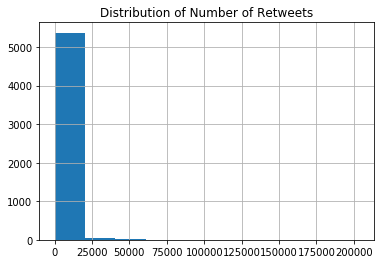

In [45]:
stweets['retweet_count'].hist()
plt.title("Distribution of Number of Retweets")

Text(0.5, 1.0, 'Distribution of Most Common Number of Retweets Occurrences')

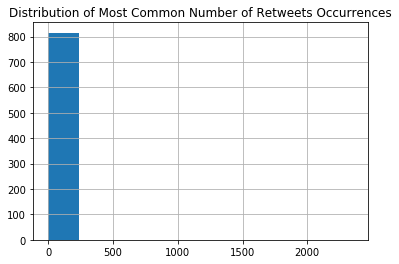

In [46]:
stweets['retweet_count'].value_counts().hist()
plt.title("Distribution of Most Common Number of Retweets Occurrences")

### - dig into the datetime -> show only after the show

In [130]:
stweets.head()

,text,is_quote_status,retweet_count,favorite_count,lang,geo_cor,cor_cor,date_at
0,RT @Jungle_ZA: Now that #GameOfThrones has end...,False,682,0,en,NA,NA,2019-05-26 20:16:39+00:00
1,RT @GameOfThrones: The Last Watch.\nFrom @Jean...,False,4531,0,en,NA,NA,2019-05-26 20:16:37+00:00
2,RT @tukaaga: I wanna Arya In South Of Westeros...,False,3,0,en,NA,NA,2019-05-26 20:16:36+00:00
3,Less dialogue &amp; more MICHAEL BAY-EXPLOSION...,False,0,0,en,NA,NA,2019-05-26 20:16:36+00:00
4,RT @thronesfacts: HBO is releasing a 2 hour be...,False,168,0,en,NA,NA,2019-05-26 20:16:31+00:00


In [131]:
for top in stweets.sort_values("date_at", ascending=False).text[:5]:
    print(top)

RT @Jungle_ZA: Now that #GameOfThrones has ended here are some other things you could watch. 

1. Your cholesterol 
2. Your blood sugar
3.…
RT @GameOfThrones: The Last Watch.
From @JeanieFinlay, the #GameofThrones documentary premieres tonight on @HBO. https://t.co/jmTaln8BnR
RT @tukaaga: I wanna Arya In South Of Westeros after Game Of Thrones like Alice In Wonderland. Do you? @GameOfThrones @GRRMspeaking  @Maisi…
Less dialogue &amp; more MICHAEL BAY-EXPLOSIONS, please.

#popculture #pop #culture #GameofThrones #thrones #less… https://t.co/JV1zImriZS
RT @thronesfacts: HBO is releasing a 2 hour behind-the-scenes documentary for #GameofThrones⁠ ⁠S8 called ‘The Last Watch’ tonight https://t…


### Only original tweets (not starting with RT)

In [132]:
for t in stweets[stweets.text.apply(lambda x: x[:2] != 'RT')].sort_values("retweet_count", ascending = False).head(5).text:
    print(t)

The Last Watch.
From @JeanieFinlay, the #GameofThrones documentary premieres tonight on @HBO. https://t.co/jmTaln8BnR
Happy birthday Stevie Nicks! Check out Rob Sheffield's recent interview with the goddess — where she discusses ever… https://t.co/jWIek1Fgf1
HBO is releasing a 2 hour behind-the-scenes documentary for #GameofThrones⁠ ⁠S8 called ‘The Last Watch’ tonight https://t.co/6iKRuLPbfK
The True King 👑 #GameOfThrones https://t.co/5MKb9yel3Y
Kawhi Leonard is the true King of the north 👑❄️
And soon the lord of the 7 kingdoms 

#NBAPlaoyffs #RaptorsVsBucks… https://t.co/nQ9wM97McO


In [133]:
otweets = stweets[stweets.text.apply(lambda x: x[:2] != 'RT')]

In [136]:
# percentage of orignal tweets
otweets.shape[0]/stweets.shape[0]

0.5566166439290586

Text(0.5, 1.0, 'original tweets')

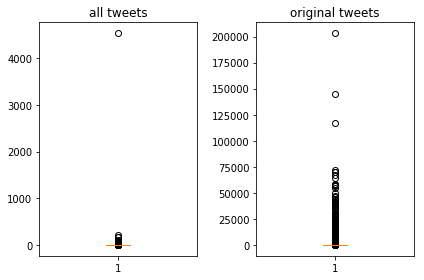

In [147]:
plt.subplot(1, 2, 1)
plt.boxplot(otweets.retweet_count)
plt.title("all tweets")
plt.subplot(1, 2, 2)
plt.boxplot(stweets.retweet_count)
plt.tight_layout()
plt.title("original tweets")

# Try getting old Tweets

import GetOldTweets3 as got

tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#GameofThrones')\
                                           .setSince("2019-05-18")\
                                           .setUntil("2019-05-19")\
                                           .setlang("en")\
                                           .setMaxTweets(20000)

many = got.manager.TweetManager.getTweets(tweetCriteria)

len(many)

things = ['text', 'date', 'retweets', 'geo', 'favorites']

tweets = pd.DataFrame()

tweets[things[0]] = list(map(lambda tweet: tweet.text, many))
tweets[things[1]] = list(map(lambda tweet: tweet.date, many))
tweets[things[2]] = list(map(lambda tweet: tweet.retweets, many))
tweets[things[3]] = list(map(lambda tweet: tweet.geo, many))
tweets[things[4]] = list(map(lambda tweet: tweet.favorites, many))

In [109]:
tweets = pd.read_csv("../data/raw/output_got.csv")

In [110]:
tweets.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,2019-05-20 23:59:58,tpurvis06,NaN,0,0,0,You’ll never love #GameOfThrones as much as I ...,NaN,NaN,#GameOfThrones,1130624236232499200,https://twitter.com/tpurvis06/status/113062423...
1,2019-05-20 23:59:58,KrystalBClear7,NaN,0,0,0,They did Queen Dany dirtyyyyyyyy! #GameOfThrones,NaN,NaN,#GameOfThrones,1130624235347615746,https://twitter.com/KrystalBClear7/status/1130...
2,2019-05-20 23:59:57,Dynastiix,NaN,0,0,0,Bran is probably feeling really insecure about...,NaN,NaN,#GameOfThrones #GOTFinale,1130624232533254144,https://twitter.com/Dynastiix/status/113062423...
3,2019-05-20 23:59:56,alisonmccourt,NaN,0,0,4,I wouldn’t trade the 8 years of watch parties....,NaN,NaN,#GameOfThronesFinale #GameOfThrones,1130624226178850817,https://twitter.com/alisonmccourt/status/11306...
4,2019-05-20 23:59:55,sponzillotv,NaN,0,0,0,"#OverheardWhileDogWalking “Because, like, the ...",NaN,NaN,#OverheardWhileDogWalking #SheWasntWrong #Game...,1130624224819859457,https://twitter.com/sponzillotv/status/1130624...


In [111]:
things = ['text', 'date', 'retweets', 'geo', 'favorites', 'hashtags']

In [112]:
tweets = tweets[things]

In [113]:
tweets.shape

(20000, 6)

### Cleaning the feed

In [114]:
# drop duplicates posted seconds/minutes/hours away from each other
tweets = tweets.drop_duplicates([x for x in tweets.columns if x is not 'date'])

In [115]:
tweets.shape

(19983, 6)

In [116]:
# sum favorites & retweets
grouped_text = tweets.groupby("text").sum().reset_index()

In [120]:
# earliest date of post
grouped_date = tweets.groupby("text").date.min().reset_index()

In [121]:
ftweets = grouped_date.merge(grouped_text, on="text", how="left")

In [122]:
ftweets.shape

(19876, 5)

In [70]:
def saveAsCoord(x):
    try:
        return tuple(x['coordinates'])
    except:
        return 'NA'

In [71]:
tweets['geo_cor'] = tweets.geo.apply(saveAsCoord)

In [72]:
tweets[tweets.geo_cor != 'NA']

,text,date,retweets,geo,favorites,hashtags,geo_cor


In [69]:
tweets.isnull().sum()

text             0
date             0
retweets         0
geo          19983
favorites        0
hashtags         0
dtype: int64

- **only keep one for same content, different links**

In [123]:
def replaceLinks(x):
    while re.search("[pic]*?.twitter.com/[a-z\d]*", x.lower()) is not None:
        temp = re.search("[pic]*?.twitter.com/[a-z\d]*", x.lower())
        x = x.replace(x[temp.start(): temp.end()], "")
    return x

In [142]:
tweets["no_links"] = tweets.text.apply(replaceLinks)

In [143]:
tweets.drop_duplicates([x for x in tweets.columns if x not in ['text', 'date']], inplace=True)

In [149]:
test = tweets.groupby("no_links").min().reset_index()

## - Most Retweeted

In [152]:
for t in test.sort_values("retweets", ascending = False).head(5).text:
    print(t)

This video wins the internet today! #GameOfThrones pic.twitter.com/JCNfjpeq5E
I'm not crying, you are. #GameOfThrones pic.twitter.com/FT9zqYOkEp
An extraordinary journey. @Isaac_H_Wright #GameofThrones pic.twitter.com/mhV3pLUTDL
Nothing sums up the snowflake generation more than this ridiculous petition to have the #GameofThrones final season rewritten. If they don't get what they want, whether it's Trump, Brexit or a TV show, they lie on the floor screaming 'I REFUSE TO ACCEPT THAT - DO IT AGAIN!!!!!'
Mom... Mom... get up mom... #GameOfThrones #gotatlanticpic.twitter.com/ympeyepzyl


## - Most Favorited

In [153]:
for t in test.sort_values("favorites", ascending = False).head(5).text:
    print(t)

An extraordinary journey. @Isaac_H_Wright #GameofThrones pic.twitter.com/mhV3pLUTDL
This video wins the internet today! #GameOfThrones pic.twitter.com/JCNfjpeq5E
Nothing sums up the snowflake generation more than this ridiculous petition to have the #GameofThrones final season rewritten. If they don't get what they want, whether it's Trump, Brexit or a TV show, they lie on the floor screaming 'I REFUSE TO ACCEPT THAT - DO IT AGAIN!!!!!'
I'm not crying, you are. #GameOfThrones pic.twitter.com/FT9zqYOkEp
THANK YOU !!!!! #gameofthrones #aryastarksequel #bestcastandcrew https://www.instagram.com/p/BxswpkslPpW/?igshid=b2ymoar0eer …


## - Most Recent Tweets

In [154]:
for t in test.sort_values("date", ascending = False).head(5).text:
    print(t)

You’ll never love #GameOfThrones as much as I don’t...
They did Queen Dany dirtyyyyyyyy! #GameOfThrones
Bran is probably feeling really insecure about his manhood now because of Sansa's comment. His third eye dosent work. #GameOfThrones #GOTFinale
I wouldn’t trade the 8 years of watch parties. I really wouldn’t. #GameOfThronesFinale #GameOfThrones
#OverheardWhileDogWalking “Because, like, the Robin Arryn glowup is only because his mom died and like he could finally get vaccinated” Done. I’m just done. #SheWasntWrong #GameOfThrones


## - Combine retweets & favorites since they are quite correlated

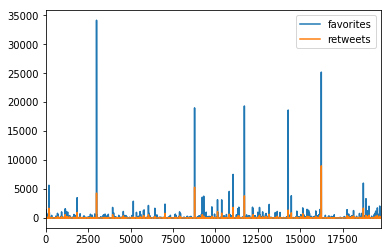

In [155]:
test[['favorites', 'retweets']].plot()

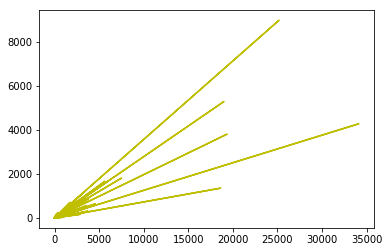

In [156]:
plt.plot(test.favorites, test.retweets, "y")

In [157]:
test[['favorites', 'retweets']].corr()

,favorites,retweets
favorites,1.00000,0.89568
retweets,0.89568,1.00000


In [158]:
test['popularity'] = test.favorites + test.retweets

## - Mentioning main characters

In [159]:
mains = ["|".join(['daenerys targaryen', "dany", "daenerys", "khaleesi", "mother of dragons", "motherofdragons", 
                   "danerys", "danaerys"]), 
         "|".join(['jon snow', 'jon']), 
         "|".join(['sansa Stark', 'sansa']), 
         "|".join(['arya Stark', 'arya']),
         "|".join(["bran Stark", "brandon Stark", "three-eyed raven", "bran"]),
         "|".join(['tyrion', 'tyrion lannister'])]

In [160]:
for char in mains:
    print(char[0],test[test.no_links.str.lower().str.contains(char)].shape[0])

d 1326
j 1584
s 615
a 751
b 1441
t 642


> Most people mentioned Jon, followed by Bran and then Dany.

In [162]:
for x in test[test.no_links.str.lower().str.contains(mains[0])].sort_values("popularity", ascending=False).head(5).text:
    print(x)

Jon to Dany there at the end #GameOfThonesFinale #GameOfThrones #DemThronespic.twitter.com/n0czgoAvkz
In S5 E2 Ser Barristan Selmy councils Daenerys to utilize restraint and warns her about following in her father’s footsteps #GameofThrones pic.twitter.com/utUm0TCiq3
I’m just really hoping this is what’s going on in Dany’s afterlife after that mess of betrayal and loss she went through #GameOfThrones pic.twitter.com/YbQdofNUhJ
Great CGI work! #Daenerys #Drogon #GameOfThrones pic.twitter.com/JaxPlk3a7r
For what’s (hopefully!) my last #GameofThrones piece, I wrote about why Dany’s story ending on the “Jon & Tyrion Talk In Circles” show was so frustrating, and how hard Emilia Clarke crushed it, anyway. https://variety.com/2019/tv/columns/game-of-thrones-series-finale-dany-daenerys-death-mad-queen-1203221341/ …


In [163]:
for x in test[test.no_links.str.lower().str.contains(mains[1])].sort_values("popularity", ascending=False).head(5).text:
    print(x)

Jon to Dany there at the end #GameOfThonesFinale #GameOfThrones #DemThronespic.twitter.com/n0czgoAvkz
#GameofThrones >yara greyjoy won the kingsmoot but is anti democracy and fought for independence >prince of dorne has no idea wtf a 3 eyed raven is >gendry literal heir to the throne >jon snow also literally the heir to the throne tyrion: lets vote for bran lords of westeros: pic.twitter.com/IsKXS62kUy
For what’s (hopefully!) my last #GameofThrones piece, I wrote about why Dany’s story ending on the “Jon & Tyrion Talk In Circles” show was so frustrating, and how hard Emilia Clarke crushed it, anyway. https://variety.com/2019/tv/columns/game-of-thrones-series-finale-dany-daenerys-death-mad-queen-1203221341/ …
#GameOfThrones questions... • Where did Drogon go? • How did all those rocks not severely damage Jaime & Cersei’s heads? • Who the hell is Jon going to watch for at The Wall? • Why does Bran need a master of whisperers? pic.twitter.com/8MrXh2tDMK
So what's the point of bringing Jon

## - Try seperating Spanish into its own
using #juegodetronos

In [164]:
spanish = test[test.text.str.contains("#juegodetronos")]

In [165]:
test = test[~test.text.str.contains("#juegodetronos")].reset_index(drop=True)

## - Hashtags Analysis

In [166]:
from functools import reduce

In [167]:
def findHashtags(x):
    new = re.findall("#[a-z]*", x.lower())
    return new

In [168]:
new = test.text.apply(findHashtags)

In [169]:
all_words = []

In [170]:
all_words = reduce(lambda x, y: x+y, new.values.tolist())

In [171]:
hashtags = list(set(all_words))

In [172]:
check = sorted(hashtags, key=len, reverse=True)

In [173]:
hash_counts = [(k,v) for k,v in Counter(all_words).items()]

In [174]:
sorted_x = sorted(dict(hash_counts).items(), key=lambda kv: kv[1])

In [175]:
sorted_x[-10:]

[('#thefinalepisode', 261),
 ('#gotseasonfinale', 261),
 ('#jonsnow', 338),
 ('#gots', 340),
 ('#gameofthronesfinalepic', 341),
 ('#gotfinale', 713),
 ('#gameofthonesfinale', 1149),
 ('#gameofthronesfinale', 1775),
 ('#got', 2300),
 ('#gameofthrones', 19792)]

### -> Most used hashtags

Text(0.5, 1.0, 'Number of Mentions for the Top 10 Hashtags')

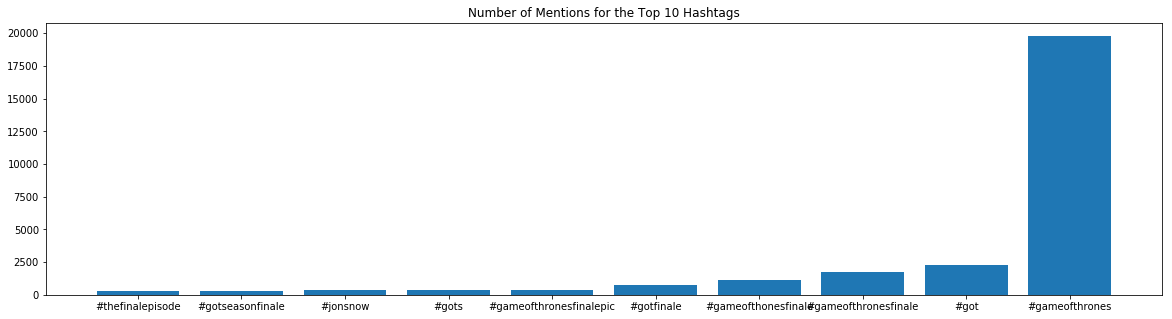

In [176]:
plt.figure(figsize=(20,5))
plt.bar([x[0] for x in sorted_x[-10:]], [x[1] for x in sorted_x[-10:]])
plt.title("Number of Mentions for the Top 10 Hashtags")

## - Topic Analysis

In [192]:
import re, string
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel

In [178]:
# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

In [179]:
# create English stop words list (you can always define your own stopwords)
stop_words = set(stopwords.words('english'))

In [180]:
# Function to remove stop words from sentences & lemmatize verbs and nouns. 
def clean(doc, lem = True):
    tokenized = word_tokenize(doc.lower())
    stop_free = [x for x in tokenized if not re.fullmatch('[' + string.punctuation + ']+', x) and x not in stop_words]
    if lem:
        lemma_verb = [lemmatizer.lemmatize(word,'v') for word in stop_free]
        lemma_noun = [lemmatizer.lemmatize(word,'n') for word in lemma_verb]
        #y = [s for s in lemma_noun if len(s) > 2]
        return lemma_noun
    else:
        return stop_free

**Step 1: Clean the corpus**
- convert the text reviews to lowercase
- remove #gameofthrones (every tweet has it)
- remove reviews with less than 3 tokens

In [181]:
def removeHashtags(x):
    for i in range(len(check)-1):
        hashed = check[i]
        try:
            x = x.lower().replace(hashed, "")
        except:
            next
    return x

In [182]:
links = re.compile('[https?]*?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+[/?\w+=?\w+]*')
def removeLinks(x):
    while re.search(links, x.lower()) is not None:
        temp = re.search(links, x.lower())
        x = x.replace(x[temp.start(): temp.end()], "")
    return x

In [183]:
for x in test.head().no_links.apply(removeHashtags):
    print(x)

 a water bottle in king’s landing!!   
!!got spoiler alert!! ... old meme, feels relevant now          @game of… https://www.instagram.com/p/bxtaabqddrn/?igshid=1tquh6sb8onjn …
" ...¡¡¡the queen in the north!!!"  
" @geekystevey: an angle! @gidi_traffic    
" died protecting his queen."   


In [184]:
for x in test.head().no_links.apply(removeLinks):
    print(x)

 a water bottle in King’s Landing!! #got #gameofthrones #GameOfThronesFinale
!!GoT SPOILER ALERT!! ... old meme, feels relevant now #SureLordOfTheRingsIsBetter #PoorMansWillowIfYouKnow #IsWinterOverNow #WhenDoesSummerCome #JusticeForSeanBean #GoTbanter #GoT #GameOfThrones #Banter @Game Of…  …
" ...¡¡¡THE QUEEN IN THE NORTH!!!" #GameOfThrones #GOTfinal
" @GeekyStevey: An Angle! @Gidi_Traffic #GameOfThrones #GOTFinale #GameOfThonesFinale #GOT
" Died protecting his queen." #GameOfThrones #GOT #Brienne


In [185]:
test['pure_text'] = test.text.apply(removeHashtags)

In [186]:
test['pure_text'] = test.pure_text.apply(replaceLinks)

In [187]:
test['pure_text'] = test.pure_text.apply(removeLinks)

In [188]:
review = test.pure_text.values.tolist()

In [189]:
long_review = [x for x in review if len(x) > 3]

In [190]:
len(review), len(long_review)

(19726, 19726)

- tokenize them
- remove punctuations, and stop words.
- filter the terms which occurred less than 10 times in your documents (i.e., reviews).
- with and without lemmatization

In [195]:
# with lemmatization
skim_review = [clean(doc.strip()) for doc in long_review]

# without lemmatization
ori_review = [clean(doc.strip(), False) for doc in long_review]

**Step 2: Create the dictionary**

After you cleaned your corpus, you will create the term dictionary.

Note: There are multiple languages

-With lemmatization

In [196]:
from collections import Counter

freq = [(k,v) for k,v in Counter([item for sublist in skim_review for item in sublist]).items() 
        if v >= 10 and re.search('\d+', k) is None]

dictionary = [x[0] for x in freq]

In [ ]:
-Without lemmatization

In [50]:
ori_freq = [(k,v) for k,v in Counter([item for sublist in ori_review for item in sublist]).items() 
            if v >= 10 and re.search('\d+', k) is None]
In [51]:
ori_dictionary = [x[0] for x in ori_freq]

**Step 3: DT**

Convert the list of documents in your corpus into Document-Term Matrix using the dictionary prepared at Step 2 (again, a term is a word).

-With lemmatization

In [197]:
Dic = corpora.Dictionary([dictionary])
corpus = [Dic.doc2bow(doc_clean) for doc_clean in skim_review]

In [ ]:
-Without lemmatization

In [56]:
ori_Dic = corpora.Dictionary([ori_dictionary])
In [57]:
ori_corpus = [Dic.doc2bow(doc_clean) for doc_clean in ori_review]

**Step 4: Run the LDA model on the document-term matrix**
    
LDA with the following parameters: number of topics (k = 10), number of passes (pass = 20), and number of iterations (iterations = 2000).

-With lemmatization

In [204]:
# LDA model needs many iterations/passes and a large corpus to work well
# must define the number of topics you want to extract from the corpus
ldamodel = LdaModel(corpus, num_topics=5, id2word = Dic, passes=20, iterations=2000)

In [ ]:
-Without lemmatization
# LDA model needs many iterations/passes and a large corpus to work well
# must define the number of topics you want to extract from the corpus
ori_ldamodel = LdaModel(ori_corpus, num_topics=10, id2word = ori_Dic, passes=20, iterations=2000)

**Step 5: For each of the k topics, print the top 10 words**

In [205]:
ori_tops = ldamodel.print_topics(num_topics=5, num_words=10)

In [209]:
pd.DataFrame([re.findall("\"\w*[.']?\w*\"", x[1]) for x in ori_tops])\
    .rename(index=dict(zip(range(5), ["topic"+str(x) for x in range(5)])),
            columns=dict(zip(range(10), ["word_"+str(x) for x in range(10)])))

,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9
topic0,"""queen""","""'s""","""arya""","""north""","""go""","""jon""","""sansa""","""westeros""","""stark""","""na"""
topic1,"""bran""","""jon""","""king""","""n't""","""tyrion""","""get""","""know""",None,None,None
topic2,"""season""","""episode""","""end""","""last""","""finale""","""series""","""watch""","""final""","""'s""","""get"""
topic3,"""end""","""throne""","""game""","""watch""","""'m""","""get""","""like""","""finale""",None,None
topic4,"""show""","""thank""","""best""","""tv""","""gameofthrones""","""ever""","""miss""","""one""","""amaze""",None


## - Sentiment Analysis